In [523]:
#Michael Lust: 801094861
#ECGR 4105 Intro to Machine Learning
#September 30, 2021
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [524]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()                      # To get first n rows from the dataset default value of n is 5

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [525]:
M = len(housing)
M

545

In [526]:
housing.shape

(545, 13)

In [527]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [528]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [529]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map

varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

#Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

#Applying the function of the housing list
housing[varlist] = housing[varlist].apply(binary_map)

#Check the housing dataframe
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [530]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows,
np.random.seed(0)
df_train,df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 1)
df_train.shape

(381, 13)

In [531]:
df_test.shape

(164, 13)

In [532]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
180,4500,4,2,1,0,0,1,0,1,2,0,5215000
189,3540,2,1,1,0,1,1,0,0,0,0,5040000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
444,3120,3,1,2,0,0,0,0,0,0,0,3220000
81,4000,3,2,2,1,0,1,0,1,1,0,6615000


In [533]:
df_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
62,6240,4,2,2,1,0,0,0,1,1,0,7070000
247,8400,4,1,4,1,0,0,0,0,3,0,4550000
142,10500,4,2,2,1,0,0,0,0,1,0,5600000
107,6420,3,1,3,1,0,1,0,0,0,1,6125000
483,6615,3,1,2,1,0,0,0,0,0,0,2940000


In [534]:
df_Newtrain.shape

(381, 12)

In [535]:
df_Newtest.shape

(164, 12)

In [536]:
#Problem 1

In [537]:
#-------------------------------------------------------------------------------------------------------------------------#

In [538]:
#Starting of with testing the training set at 70%
area_T = df_Newtrain.values[:, 0] #Getting the values of each variable in the first column
bedrooms_T = df_Newtrain.values[:, 1] #Getting the values of each variable in the second column
bathrooms_T = df_Newtrain.values[:, 2] #Getting the values of each variable in the third column
stories_T = df_Newtrain.values[:, 3] #Getting the values of each variable in the fourth column
mainroad_T = df_Newtrain.values[:, 4] #Getting the values of each variable in the fifth column
guestroom_T = df_Newtrain.values[:, 5] #Getting the values of each variable in the first column
basement_T = df_Newtrain.values[:, 6] #Getting the values of each variable in the first column
hotwaterheating_T = df_Newtrain.values[:, 7] #Getting the values of each variable in the first column
airconditioning_T = df_Newtrain.values[:, 8] #Getting the values of each variable in the first column
parking_T = df_Newtrain.values[:, 9] #Getting the values of each variable in the first column
prefarea_T = df_Newtrain.values[:, 10] #Getting the values of each variable in the first column
price_T = df_Newtrain.values[:, 11] #Setting the last column as my result for y = price.

#Then continuting with testing the validation set at 30%
area_V = df_Newtest.values[:, 0] #Getting the values of each variable in the first column
bedrooms_V = df_Newtest.values[:, 1] #Getting the values of each variable in the second column
bathrooms_V = df_Newtest.values[:, 2] #Getting the values of each variable in the third column
stories_V = df_Newtest.values[:, 3] #Getting the values of each variable in the fourth column
mainroad_V = df_Newtest.values[:, 4] #Getting the values of each variable in the fifth column
guestroom_V = df_Newtest.values[:, 5] #Getting the values of each variable in the first column
basement_V = df_Newtest.values[:, 6] #Getting the values of each variable in the first column
hotwaterheating_V = df_Newtest.values[:, 7] #Getting the values of each variable in the first column
airconditioning_V = df_Newtest.values[:, 8] #Getting the values of each variable in the first column
parking_V = df_Newtest.values[:, 9] #Getting the values of each variable in the first column
prefarea_V = df_Newtest.values[:, 10] #Getting the values of each variable in the first column
price_V = df_Newtest.values[:, 11] #Setting the last column as my result for y = price.

M_T = len(price_T) #Number of training examples
M_V = len(price_V) #Number of validation examples

print('M = ', M)

M =  545


In [539]:
#Printing the training set at 70%
print('X = ', area_T[: 381]) # Show all the data points for X1
print('X = ', bedrooms_T[: 381]) # Show all the data points for X2
print('X = ', bathrooms_T[: 381]) # Show all the data points for X3
print('X = ', stories_T[: 381]) # Show all the data points for X4
print('X = ', mainroad_T[: 381]) # Show all the data points for X5
print('X = ', guestroom_T[: 381]) # Show all the data points for X6
print('X = ', basement_T[: 381]) # Show all the data points for X7
print('X = ', hotwaterheating_T[: 381]) # Show all the data points for X8
print('X = ', airconditioning_T[: 381]) # Show all the data points for X9
print('X = ', parking_T[: 381]) # Show all the data points for X10
print('X = ', prefarea_T[: 381]) # Show all the data points for X11
print('Y = ', price_T[: 381]) # Show all the data points for Y

print('M = ', M_T)

X =  [ 4500  3540  7200  3120  4000  2015  4040  8000  2787  3512  3420  6060
  4500  6360  5450  8250  3960  7410 10360  3630  6020  4100  6254  4500
  4560  6710  3500  8880  3600  7152  6000  4040  4000  4040  5360  6600
  3800  3960  4900  3480  3584  2275  4000  6500 10500  8960  3290  8875
  8580  3450  6600  2800  5640  3745 10269  6100 12090  5880  6750  6000
  5320  4000  4040 15600  3090  3970  5450  4770  4095  6000  6540  6550
  4320  3100  4050  3650  3850  5600  2817  4510  3000  4995 11410  3000
  4840  3600  4000  3500  7800  5300  4840  3000  3480  2970  5828  3800
  4040 10700  7320  5000  6325  2880  4300  3150  4000  9500  4500  3420
  3180  2145  5400  3630  6750  4820  5136  4120  6825  4600  6650  5800
  5720  5000  4352  3300  2160  5900  3000  4500  3350  5400  4600  9800
  3630  2610  9667  3635  4000  3180  3630  6600  2610  4960  5150  6000
  3640  2910  3650  3450  4032  7980  1905  6000  3360  9620  1950 12900
  3240  4320  6540  6000  7440  3760  8100  48

In [540]:
#Printing the validation set at 30%
print('X = ', area_V[: 164]) # Show all the data points for X1
print('X = ', bedrooms_V[: 164]) # Show all the data points for X2
print('X = ', bathrooms_V[: 164]) # Show all the data points for X3
print('X = ', stories_V[: 164]) # Show all the data points for X4
print('X = ', mainroad_V[: 164]) # Show all the data points for X5
print('X = ', guestroom_V[: 164]) # Show all the data points for X6
print('X = ', basement_V[: 164]) # Show all the data points for X7
print('X = ', hotwaterheating_V[: 164]) # Show all the data points for X8
print('X = ', airconditioning_V[: 164]) # Show all the data points for X9
print('X = ', parking_V[: 164]) # Show all the data points for X10
print('X = ', prefarea_V[: 164]) # Show all the data points for X11
print('Y = ', price_V[: 164]) # Show all the data points for Y

print('M = ', M_V)

X =  [ 6240  8400 10500  6420  6615  3600  3240  6600  2700  5000  2650  4775
  4800  3700  7700  7420  4280  6000  6600  3649  3420  5500  3630  3180
  3600  8400  3000  8880  5750  2145  6360  6525  1950  5850  8372  2870
  4990  2684  5200  6321  4960  3480  3210  4950  6840  4350  5850  4410
  2500  3850  3180  3162  3500  4340  6440  5010  3000  4920  3760  3816
  6000  7000  3640  4080  4160  2910  6060  3000  2787  4815  4785  6600
  5300  3600  6000  2176  3000  7420  7020  3480  5960  3510  6420  6450
  6210  4500  3000  3180  5700  3520  4040  5800  2800  6480  4960  4260
  7500  5880 10500  4500  3850  8500  3120  3990  4095  4800 13200  7770
  6100  4075  6550  4100  4370  3180  7350  3510  3640  5500  8250  6600
  8250  2475  3850  4500  3720  4360 10240  5500  3970  3450  3850  5500
  3520  2145  6600  3640  3986  2953  8250  4130  8580  6000  3500  5885
  7680  2430  3150  6450  8100  5500  1650  3040  4079  2747  4600  2325
  7231  3520  2145  3450  3620  4000  6000  60

In [541]:
def calculate_scalar(X, Y, theta): #Declaring values and computing the Scalar value J
    
    predictions = X.dot(theta)  #Dot product of array X and theta
    errors = np.subtract(predictions,Y) #Matrix subtraction with predictions and Y
    squaringErrors = np.square(errors) #Now errors contained in matrix. We square all values in matrix error.
    J = 1/(2*M)*np.sum(squaringErrors) #Scalar equation using matrix squErrors
    return J

In [542]:
def gradient_descent(X, Y, theta, alpha, iterations):  #Function to calculate gradient descent for linear regression
    
    result = np.zeros(iterations)   #creating a row of an array with an undetermined amount of zeroes.
    theta_interval = np.zeros([iterations, theta.size])  #creating an array for each interval to be plotted (X1, X2, X3) 
    
    for i in range(iterations):    #For loop with iterations as an input.
        predictions = X.dot(theta)   #Dot product of array X and theta resulting in scalar
        errors = np.subtract(predictions,Y) #Matrix subtration between predictions and value Y
        sum_delta = (alpha/M)*X.transpose().dot(errors); #learning rate over training examples * scalar of resulting dot product.  
        theta = theta-sum_delta;   #Current theta minus scalar sum_delta for final value of theta                      
        result[i] = calculate_scalar(X, Y, theta)
        theta_interval[i] = theta #Needed to show the previous thetas used for the resulting scalar.

    return theta, result, theta_interval

In [543]:
# Part 1-a

In [544]:
# Using reshape function convert all X variables 1D array to 2D array for Training Set
X_T = np.ones((M_T,1))
Y_T = price_T 

area_T = area_T.reshape(M_T,1)
bedrooms_T = bedrooms_T.reshape(M_T,1)
bathrooms_T = bathrooms_T.reshape(M_T,1)
stories_T = stories_T.reshape(M_T,1)
parking_T = parking_T.reshape(M_T,1)

X_T = np.hstack((X_T,area_T,bedrooms_T,bathrooms_T,stories_T,parking_T))

In [545]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(6)
iterations = 500;
alpha = 0.01; #This is to avoid getting overfill error.
result_T = calculate_scalar(X_T,Y_T, theta)
print('Scalar values is ', result_T) #Print the scalar value for Gradient Descent

Scalar values is  9103980391952.844


In [546]:
#Calculating gradient descent with theta and scalar J for training set
theta, result_T, theta_interval = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_T)

Final value of theta = [nan nan nan nan nan nan]
Y =  [4.07110006e+023 2.09126973e+034 1.07425733e+045 5.51831642e+055
 2.83468544e+066 1.45614005e+077 7.47999696e+087 3.84237454e+098
 1.97377648e+109 1.01390262e+120 5.20828232e+130 2.67542507e+141
 1.37433012e+152 7.05975029e+162 3.62649944e+173 1.86288432e+184
 9.56938797e+194 4.91566679e+205 2.52511238e+216 1.29711650e+227
 6.66311423e+237 3.42275279e+248 1.75822239e+259 9.03175361e+269
 4.63949120e+280 2.38324466e+291 1.22424095e+302             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             nan             nan    

In [547]:
# Using reshape function convert all X variables 1D array to 2D array for Validation Set
X_V = np.ones((M_V,1))
Y_V = price_V 

area_V = area_V.reshape(M_V,1)
bedrooms_V = bedrooms_V.reshape(M_V,1)
bathrooms_V = bathrooms_V.reshape(M_V,1)
stories_V = stories_V.reshape(M_V,1)
parking_V = parking_V.reshape(M_V,1)

X_V = np.hstack((X_V,area_V,bedrooms_V,bathrooms_V,stories_V,parking_V))

In [548]:
#Making a theta array with initializations of O and setting validation parameters.
theta = np.zeros(6)
iterations = 500;
alpha = 0.01; #This is to avoid getting overfill error.;
result_V = calculate_scalar(X_V,Y_V, theta)
print('Scalar values is ', result_V) #Print the scalar value for Gradient Descent

Scalar values is  4002935972706.4224


In [549]:
#Calculating gradient descent with theta and scalar J for validation set
theta, result_V, theta_interval = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_V)

Final value of theta = [nan nan nan nan nan nan]
Y =  [2.58455933e+022 1.89561580e+032 1.39031797e+042 1.01971299e+052
 7.47896959e+061 5.48536566e+071 4.02317940e+081 2.95075542e+091
 2.16419819e+101 1.58730669e+111 1.16419213e+121 8.53863553e+130
 6.26256566e+140 4.59320795e+150 3.36883642e+160 2.47083497e+170
 1.81220596e+180 1.32914196e+190 9.74844140e+199 7.14988408e+209
 5.24400161e+219 3.84615367e+229 2.82091790e+239 2.06897033e+249
 1.51746289e+259 1.11296599e+269 8.16292318e+278 5.98700368e+288
 4.39110013e+298             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf    

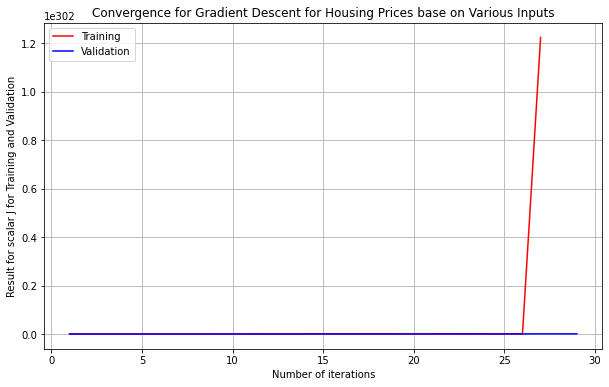

In [550]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_T, color='Red', label='Training' )
plt.plot(range(1, iterations + 1), result_V, color='Blue', label='Validation' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Result for scalar J for Training and Validation')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [551]:
#Part 1-b

In [552]:
# Using reshape function convert all X variables 1D array to 2D array for training set
X_T = np.ones((M_T,1))
Y_T = price_T

area_T = area_T.reshape(M_T,1)
bedrooms_T = bedrooms_T.reshape(M_T,1)
bathrooms_T = bathrooms_T.reshape(M_T,1)
stories_T = stories_T.reshape(M_T,1)
mainroad_T = mainroad_T.reshape(M_T,1)
guestroom_T = guestroom_T.reshape(M_T,1)
basement_T = basement_T.reshape(M_T,1)
hotwaterheating_T = hotwaterheating_T.reshape(M_T,1)
airconditioning_T = airconditioning_T.reshape(M_T,1)
parking_T = parking_T.reshape(M_T,1)
prefarea_T = prefarea_T.reshape(M_T,1)

X_T = np.hstack((X_T,area_T,bedrooms_T,bathrooms_T,stories_T,mainroad_T,guestroom_T,basement_T,hotwaterheating_T,airconditioning_T,parking_T,prefarea_T))

In [553]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(12)
iterations = 500;
alpha = 0.01; #This is to avoid getting overfill error.
result_T = calculate_scalar(X_T,Y_T, theta)
print('Scalar values is ', result_T) #Print the scalar value for Gradient Descent

Scalar values is  9103980391952.844


In [554]:
#Calculating gradient descent with theta and scalar J
theta, result_T, theta_interval = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_T)

Final value of theta = [nan nan nan nan nan nan nan nan nan nan nan nan]
Y =  [4.07110034e+023 2.09127000e+034 1.07425753e+045 5.51831781e+055
 2.83468633e+066 1.45614060e+077 7.48000023e+087 3.84237645e+098
 1.97377759e+109 1.01390325e+120 5.20828588e+130 2.67542706e+141
 1.37433123e+152 7.05975642e+162 3.62650280e+173 1.86288617e+184
 9.56939803e+194 4.91567226e+205 2.52511534e+216 1.29711811e+227
 6.66312288e+237 3.42275744e+248 1.75822489e+259 9.03176699e+269
 4.63949836e+280 2.38324849e+291 1.22424299e+302             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
            

In [555]:
# Using reshape function convert all X variables 1D array to 2D array for training set
X_V = np.ones((M_V,1))
Y_V = price_V

area_V = area_V.reshape(M_V,1)
bedrooms_V = bedrooms_V.reshape(M_V,1)
bathrooms_V = bathrooms_V.reshape(M_V,1)
stories_V = stories_V.reshape(M_V,1)
mainroad_V = mainroad_V.reshape(M_V,1)
guestroom_V = guestroom_V.reshape(M_V,1)
basement_V = basement_V.reshape(M_V,1)
hotwaterheating_V = hotwaterheating_V.reshape(M_V,1)
airconditioning_V = airconditioning_V.reshape(M_V,1)
parking_V = parking_V.reshape(M_V,1)
prefarea_V = prefarea_V.reshape(M_V,1)

X_V = np.hstack((X_V,area_V,bedrooms_V,bathrooms_V,stories_V,mainroad_V,guestroom_V,basement_V,hotwaterheating_V,airconditioning_V,parking_V,prefarea_V))

In [556]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(12)
iterations = 500;
alpha = 0.01; #This is to avoid getting overfill error.
result_V = calculate_scalar(X_V,Y_V, theta)
print('Scalar values is ', result_V) #Print the scalar value for Gradient Descent

Scalar values is  4002935972706.4224


In [557]:
#Calculating gradient descent with theta and scalar J
theta, result_V, theta_interval = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_V)

Final value of theta = [nan nan nan nan nan nan nan nan nan nan nan nan]
Y =  [2.58455954e+022 1.89561610e+032 1.39031829e+042 1.01971330e+052
 7.47897242e+061 5.48536814e+071 4.02318152e+081 2.95075720e+091
 2.16419965e+101 1.58730787e+111 1.16419309e+121 8.53864320e+130
 6.26257174e+140 4.59321275e+150 3.36884019e+160 2.47083792e+170
 1.81220826e+180 1.32914375e+190 9.74845521e+199 7.14989474e+209
 5.24400982e+219 3.84615997e+229 2.82092274e+239 2.06897403e+249
 1.51746571e+259 1.11296815e+269 8.16293960e+278 5.98701616e+288
 4.39110961e+298             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
            

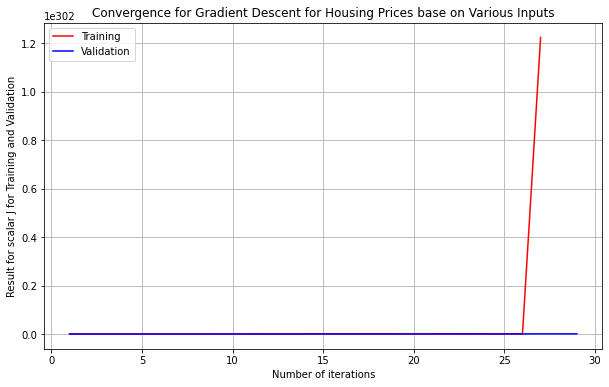

In [558]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_T, color='Red', label='Training' )
plt.plot(range(1, iterations + 1), result_V, color='Blue', label='Validation' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Result for scalar J for Training and Validation')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [559]:
#*************************************************************************************************************************#
#*************************************************************************************************************************#

In [560]:
#Problem 2

In [561]:
#-------------------------------------------------------------------------------------------------------------------------#

In [562]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
180,4500,4,2,1,0,0,1,0,1,2,0,5215000
189,3540,2,1,1,0,1,1,0,0,0,0,5040000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
444,3120,3,1,2,0,0,0,0,0,0,0,3220000
81,4000,3,2,2,1,0,1,0,1,1,0,6615000


In [563]:
df_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
62,6240,4,2,2,1,0,0,0,1,1,0,7070000
247,8400,4,1,4,1,0,0,0,0,3,0,4550000
142,10500,4,2,2,1,0,0,0,0,1,0,5600000
107,6420,3,1,3,1,0,1,0,0,0,1,6125000
483,6615,3,1,2,1,0,0,0,0,0,0,2940000


In [564]:
df_Newtrain.shape

(381, 12)

In [565]:
df_Newtest.shape

(164, 12)

In [566]:
#Here we can see that except for area, all the columns have small integer values.
#So it is extremely important to rescale the variables so that they have a comparable scales
#If we don't have comparable scales, then some of the coefficients as obtained by fitting
#This might become very annoying at the time of model evaluation. 
#So it is advised to use standardization or normalization so that the units of the coefficient 

#As you know, there are two common ways of rescaling:
#1. Min-Max scaling
#2. Standardisation (mean-0, sigma-1)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#define standard scalar
#scalar = StandardScalar()
scalar = MinMaxScaler()
df_Newtrain[num_vars] = scalar.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
180,0.193103,0.6,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.330000
189,0.126897,0.2,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.313333
93,0.379310,0.4,0.333333,0.000000,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.433333
444,0.097931,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.140000
81,0.158621,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.463333
345,0.021724,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.200000
314,0.161379,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.223333
115,0.434483,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.406667
286,0.074966,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.236667
400,0.124966,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.166667


In [567]:
df_Newtest[num_vars] = scalar.fit_transform(df_Newtest[num_vars])
df_Newtest.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
62,0.397403,0.666667,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.460606
247,0.584416,0.666667,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.242424
142,0.766234,0.666667,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333
107,0.412987,0.333333,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.378788
483,0.429870,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.103030
351,0.168831,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.175758
516,0.137662,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.060606
47,0.428571,0.333333,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.496970
481,0.090909,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.103030
90,0.290043,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.406061


In [568]:
#Starting of with testing the training set at 70%
area_T = df_Newtrain.values[:, 0] #Getting the values of each variable in the first column
bedrooms_T = df_Newtrain.values[:, 1] #Getting the values of each variable in the second column
bathrooms_T = df_Newtrain.values[:, 2] #Getting the values of each variable in the third column
stories_T = df_Newtrain.values[:, 3] #Getting the values of each variable in the fourth column
mainroad_T = df_Newtrain.values[:, 4] #Getting the values of each variable in the fifth column
guestroom_T = df_Newtrain.values[:, 5] #Getting the values of each variable in the first column
basement_T = df_Newtrain.values[:, 6] #Getting the values of each variable in the first column
hotwaterheating_T = df_Newtrain.values[:, 7] #Getting the values of each variable in the first column
airconditioning_T = df_Newtrain.values[:, 8] #Getting the values of each variable in the first column
parking_T = df_Newtrain.values[:, 9] #Getting the values of each variable in the first column
prefarea_T = df_Newtrain.values[:, 10] #Getting the values of each variable in the first column
price_T = df_Newtrain.values[:, 11] #Setting the last column as my result for y = price.

#Then continuting with testing the validation set at 30%
area_V = df_Newtest.values[:, 0] #Getting the values of each variable in the first column
bedrooms_V = df_Newtest.values[:, 1] #Getting the values of each variable in the second column
bathrooms_V = df_Newtest.values[:, 2] #Getting the values of each variable in the third column
stories_V = df_Newtest.values[:, 3] #Getting the values of each variable in the fourth column
mainroad_V = df_Newtest.values[:, 4] #Getting the values of each variable in the fifth column
guestroom_V = df_Newtest.values[:, 5] #Getting the values of each variable in the first column
basement_V = df_Newtest.values[:, 6] #Getting the values of each variable in the first column
hotwaterheating_V = df_Newtest.values[:, 7] #Getting the values of each variable in the first column
airconditioning_V = df_Newtest.values[:, 8] #Getting the values of each variable in the first column
parking_V = df_Newtest.values[:, 9] #Getting the values of each variable in the first column
prefarea_V = df_Newtest.values[:, 10] #Getting the values of each variable in the first column
price_V = df_Newtest.values[:, 11] #Setting the last column as my result for y = price.

M_T = len(price_T) #Number of training examples
M_V = len(price_V) #Number of validation examples

print('M = ', M)

M =  545


In [569]:
#Printing the training set at 70%
print('X = ', area_T[: 381]) # Show all the data points for X1
print('X = ', bedrooms_T[: 381]) # Show all the data points for X2
print('X = ', bathrooms_T[: 381]) # Show all the data points for X3
print('X = ', stories_T[: 381]) # Show all the data points for X4
print('X = ', mainroad_T[: 381]) # Show all the data points for X5
print('X = ', guestroom_T[: 381]) # Show all the data points for X6
print('X = ', basement_T[: 381]) # Show all the data points for X7
print('X = ', hotwaterheating_T[: 381]) # Show all the data points for X8
print('X = ', airconditioning_T[: 381]) # Show all the data points for X9
print('X = ', parking_T[: 381]) # Show all the data points for X10
print('X = ', prefarea_T[: 381]) # Show all the data points for X11
print('Y = ', price_T[: 381]) # Show all the data points for Y

print('M = ', M_T)

X =  [0.19310345 0.12689655 0.37931034 0.09793103 0.15862069 0.02172414
 0.16137931 0.43448276 0.07496552 0.12496552 0.11862069 0.30068966
 0.19310345 0.32137931 0.25862069 0.45172414 0.15586207 0.3937931
 0.59724138 0.13310345 0.29793103 0.16551724 0.31406897 0.19310345
 0.19724138 0.34551724 0.12413793 0.49517241 0.13103448 0.376
 0.29655172 0.16137931 0.15862069 0.16137931 0.25241379 0.33793103
 0.14482759 0.15586207 0.22068966 0.12275862 0.12993103 0.03965517
 0.15862069 0.33103448 0.60689655 0.50068966 0.10965517 0.49482759
 0.47448276 0.12068966 0.33793103 0.07586207 0.27172414 0.14103448
 0.59096552 0.30344828 0.71655172 0.28827586 0.34827586 0.29655172
 0.24965517 0.15862069 0.16137931 0.95862069 0.09586207 0.15655172
 0.25862069 0.21172414 0.16517241 0.29655172 0.3337931  0.33448276
 0.18068966 0.09655172 0.16206897 0.13448276 0.14827586 0.26896552
 0.07703448 0.1937931  0.08965517 0.22724138 0.66965517 0.08965517
 0.21655172 0.13103448 0.15862069 0.12413793 0.42068966 0.24827

In [570]:
#Printing the validation set at 30%
print('X = ', area_V[: 164]) # Show all the data points for X1
print('X = ', bedrooms_V[: 164]) # Show all the data points for X2
print('X = ', bathrooms_V[: 164]) # Show all the data points for X3
print('X = ', stories_V[: 164]) # Show all the data points for X4
print('X = ', mainroad_V[: 164]) # Show all the data points for X5
print('X = ', guestroom_V[: 164]) # Show all the data points for X6
print('X = ', basement_V[: 164]) # Show all the data points for X7
print('X = ', hotwaterheating_V[: 164]) # Show all the data points for X8
print('X = ', airconditioning_V[: 164]) # Show all the data points for X9
print('X = ', parking_V[: 164]) # Show all the data points for X10
print('X = ', prefarea_V[: 164]) # Show all the data points for X11
print('Y = ', price_V[: 164]) # Show all the data points for Y

print('M = ', M_V)

X =  [0.3974026  0.58441558 0.76623377 0.41298701 0.42987013 0.16883117
 0.13766234 0.42857143 0.09090909 0.29004329 0.08658009 0.27056277
 0.27272727 0.17748918 0.52380952 0.4995671  0.22770563 0.37662338
 0.42857143 0.17307359 0.15324675 0.33333333 0.17142857 0.13246753
 0.16883117 0.58441558 0.11688312 0.62597403 0.35497835 0.04285714
 0.40779221 0.42207792 0.02597403 0.36363636 0.58199134 0.10562771
 0.28917749 0.08952381 0.30735931 0.40441558 0.28658009 0.15844156
 0.13506494 0.28571429 0.44935065 0.23376623 0.36363636 0.23896104
 0.07359307 0.19047619 0.13246753 0.13090909 0.16017316 0.23290043
 0.41471861 0.29090909 0.11688312 0.28311688 0.18268398 0.18753247
 0.37662338 0.46320346 0.17229437 0.21038961 0.21731602 0.10909091
 0.38181818 0.11688312 0.09844156 0.27402597 0.27142857 0.42857143
 0.31601732 0.16883117 0.37662338 0.04554113 0.11688312 0.4995671
 0.46493506 0.15844156 0.37316017 0.16103896 0.41298701 0.41558442
 0.39480519 0.24675325 0.11688312 0.13246753 0.35064935 0.

In [571]:
# Part 2-a

In [572]:
# Using reshape function convert all X variables 1D array to 2D array for Training Set
X_T = np.ones((M_T,1))
Y_T = price_T 

area_T = area_T.reshape(M_T,1)
bedrooms_T = bedrooms_T.reshape(M_T,1)
bathrooms_T = bathrooms_T.reshape(M_T,1)
stories_T = stories_T.reshape(M_T,1)
parking_T = parking_T.reshape(M_T,1)

X_T = np.hstack((X_T,area_T,bedrooms_T,bathrooms_T,stories_T,parking_T))

In [573]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(6)
iterations = 500;
alpha = 0.01;
result_T = calculate_scalar(X_T,Y_T, theta)
print('Scalar values is ', result_T) #Print the scalar value for Gradient Descent

Scalar values is  0.03929700503217126


In [574]:
#Calculating gradient descent with theta and scalar J for training set
theta, result_T, theta_interval = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_T)

Final value of theta = [0.18619475 0.08429332 0.09284391 0.05928023 0.09172091 0.08548793]
Y =  [0.03869566 0.03810571 0.03752696 0.03695918 0.03640216 0.03585571
 0.03531962 0.03479369 0.03427773 0.03377156 0.03327497 0.0327878
 0.03230986 0.03184097 0.03138097 0.03092969 0.03048695 0.0300526
 0.02962647 0.02920842 0.02879828 0.02839591 0.02800115 0.02761387
 0.02723392 0.02686116 0.02649545 0.02613666 0.02578466 0.02543932
 0.02510051 0.02476811 0.024442   0.02412205 0.02380815 0.02350018
 0.02319803 0.0229016  0.02261076 0.02232542 0.02204547 0.02177081
 0.02150133 0.02123694 0.02097755 0.02072305 0.02047335 0.02022836
 0.019988   0.01975217 0.01952078 0.01929376 0.01907102 0.01885248
 0.01863806 0.01842768 0.01822126 0.01801872 0.01782001 0.01762503
 0.01743372 0.01724602 0.01706184 0.01688113 0.01670382 0.01652984
 0.01635914 0.01619164 0.01602729 0.01586602 0.01570779 0.01555252
 0.01540017 0.01525068 0.01510399 0.01496006 0.01481882 0.01468023
 0.01454424 0.0144108  0.01427985 0

In [575]:
# Using reshape function convert all X variables 1D array to 2D array for Validation Set
X_V = np.ones((M_V,1))
Y_V = price_V 

area_V = area_V.reshape(M_V,1)
bedrooms_V = bedrooms_V.reshape(M_V,1)
bathrooms_V = bathrooms_V.reshape(M_V,1)
stories_V = stories_V.reshape(M_V,1)
parking_V = parking_V.reshape(M_V,1)

X_V = np.hstack((X_V,area_V,bedrooms_V,bathrooms_V,stories_V,parking_V))

In [576]:
#Making a theta array with initializations of O and setting validation parameters.
theta = np.zeros(6)
iterations = 500;
alpha = 0.01;
result_V = calculate_scalar(X_V,Y_V, theta)
print('Scalar values is ', result_V) #Print the scalar value for Gradient Descent

Scalar values is  0.014721578503972165


In [577]:
#Calculating gradient descent with theta and scalar J for validation set
theta, result_V, theta_interval = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_V)

Final value of theta = [0.15678227 0.06616328 0.06484567 0.04638205 0.0706804  0.0585738 ]
Y =  [0.0146279  0.01453498 0.01444281 0.01435139 0.01426071 0.01417076
 0.01408154 0.01399305 0.01390527 0.0138182  0.01373184 0.01364618
 0.01356121 0.01347692 0.01339332 0.0133104  0.01322815 0.01314656
 0.01306563 0.01298536 0.01290574 0.01282676 0.01274843 0.01267072
 0.01259364 0.01251719 0.01244136 0.01236614 0.01229153 0.01221752
 0.01214411 0.01207129 0.01199907 0.01192742 0.01185636 0.01178587
 0.01171595 0.0116466  0.0115778  0.01150957 0.01144188 0.01137474
 0.01130815 0.01124209 0.01117656 0.01111157 0.0110471  0.01098315
 0.01091972 0.0108568  0.01079439 0.01073248 0.01067108 0.01061017
 0.01054975 0.01048982 0.01043037 0.0103714  0.01031291 0.01025489
 0.01019734 0.01014026 0.01008363 0.01002746 0.00997175 0.00991648
 0.00986166 0.00980728 0.00975335 0.00969984 0.00964677 0.00959413
 0.00954191 0.00949011 0.00943873 0.00938776 0.00933721 0.00928706
 0.00923732 0.00918797 0.00913903

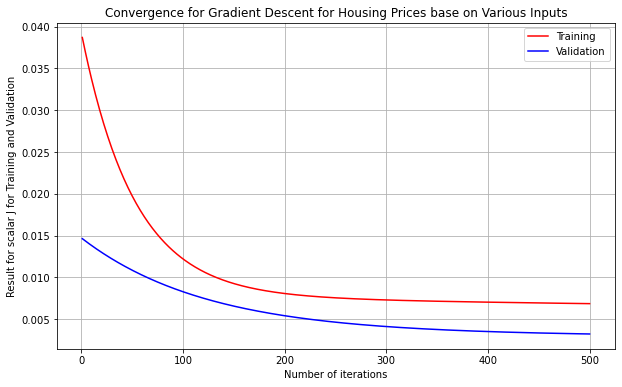

In [578]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_T, color='Red', label='Training' )
plt.plot(range(1, iterations + 1), result_V, color='Blue', label='Validation' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Result for scalar J for Training and Validation')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [579]:
#Part 2-b

In [580]:
# Using reshape function convert all X variables 1D array to 2D array for training set
X_T = np.ones((M_T,1))
Y_T = price_T

area_T = area_T.reshape(M_T,1)
bedrooms_T = bedrooms_T.reshape(M_T,1)
bathrooms_T = bathrooms_T.reshape(M_T,1)
stories_T = stories_T.reshape(M_T,1)
mainroad_T = mainroad_T.reshape(M_T,1)
guestroom_T = guestroom_T.reshape(M_T,1)
basement_T = basement_T.reshape(M_T,1)
hotwaterheating_T = hotwaterheating_T.reshape(M_T,1)
airconditioning_T = airconditioning_T.reshape(M_T,1)
parking_T = parking_T.reshape(M_T,1)
prefarea_T = prefarea_T.reshape(M_T,1)

X_T = np.hstack((X_T,area_T,bedrooms_T,bathrooms_T,stories_T,mainroad_T,guestroom_T,basement_T,hotwaterheating_T,airconditioning_T,parking_T,prefarea_T))

In [581]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(12)
iterations = 500;
alpha = 0.01;
result_T = calculate_scalar(X_T,Y_T, theta)
print('Scalar values is ', result_T) #Print the scalar value for Gradient Descent

Scalar values is  0.03929700503217126


In [582]:
#Calculating gradient descent with theta and scalar J
theta, result_T, theta_interval = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_T)

Final value of theta = [0.09074928 0.05340921 0.05597193 0.04773108 0.06692449 0.08951544
 0.03423665 0.04710398 0.01645801 0.0701313  0.05776124 0.04942422]
Y =  [0.0381544  0.03705144 0.03598675 0.03495898 0.03396686 0.03300915
 0.03208465 0.03119219 0.03033068 0.02949903 0.0286962  0.02792119
 0.02717304 0.0264508  0.02575357 0.0250805  0.02443072 0.02380345
 0.02319788 0.02261327 0.02204889 0.02150403 0.02097802 0.02047019
 0.01997993 0.0195066  0.01904964 0.01860846 0.01818251 0.01777128
 0.01737424 0.0169909  0.01662079 0.01626345 0.01591842 0.01558529
 0.01526364 0.01495307 0.01465319 0.01436363 0.01408404 0.01381407
 0.01355338 0.01330164 0.01305856 0.01282382 0.01259714 0.01237824
 0.01216684 0.01196269 0.01176553 0.01157512 0.01139123 0.01121362
 0.01104209 0.01087642 0.0107164  0.01056184 0.01041255 0.01026834
 0.01012905 0.00999449 0.00986451 0.00973894 0.00961763 0.00950044
 0.00938721 0.00927782 0.00917213 0.00907001 0.00897133 0.00887598
 0.00878385 0.00869481 0.00860876

In [583]:
# Using reshape function convert all X variables 1D array to 2D array for training set
X_V = np.ones((M_V,1))
Y_V = price_V

area_V = area_V.reshape(M_V,1)
bedrooms_V = bedrooms_V.reshape(M_V,1)
bathrooms_V = bathrooms_V.reshape(M_V,1)
stories_V = stories_V.reshape(M_V,1)
mainroad_V = mainroad_V.reshape(M_V,1)
guestroom_V = guestroom_V.reshape(M_V,1)
basement_V = basement_V.reshape(M_V,1)
hotwaterheating_V = hotwaterheating_V.reshape(M_V,1)
airconditioning_V = airconditioning_V.reshape(M_V,1)
parking_V = parking_V.reshape(M_V,1)
prefarea_V = prefarea_V.reshape(M_V,1)

X_V = np.hstack((X_V,area_V,bedrooms_V,bathrooms_V,stories_V,mainroad_V,guestroom_V,basement_V,hotwaterheating_V,airconditioning_V,parking_V,prefarea_V))

In [584]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(12)
iterations = 500;
alpha = 0.01;
result_V = calculate_scalar(X_V,Y_V, theta)
print('Scalar values is ', result_V) #Print the scalar value for Gradient Descent

Scalar values is  0.014721578503972165


In [585]:
#Calculating gradient descent with theta and scalar J
theta, result_V, theta_interval = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_V)

Final value of theta = [0.08766078 0.04286365 0.04204161 0.03495189 0.04844207 0.08261055
 0.029787   0.02795277 0.00957096 0.07679965 0.03949039 0.04124152]
Y =  [0.01453936 0.0143599  0.01418314 0.01400905 0.01383759 0.01366871
 0.01350238 0.01333856 0.01317722 0.0130183  0.01286178 0.01270762
 0.01255579 0.01240624 0.01225895 0.01211388 0.01197099 0.01183026
 0.01169164 0.01155511 0.01142064 0.0112882  0.01115775 0.01102926
 0.0109027  0.01077805 0.01065528 0.01053435 0.01041524 0.01029792
 0.01018237 0.01006856 0.00995645 0.00984603 0.00973727 0.00963014
 0.00952462 0.00942069 0.00931832 0.00921748 0.00911816 0.00902033
 0.00892397 0.00882905 0.00873555 0.00864346 0.00855275 0.0084634
 0.00837539 0.00828869 0.0082033  0.00811918 0.00803633 0.00795471
 0.00787432 0.00779513 0.00771712 0.00764028 0.00756459 0.00749003
 0.00741659 0.00734424 0.00727298 0.00720277 0.00713362 0.0070655
 0.0069984  0.00693229 0.00686718 0.00680303 0.00673984 0.00667759
 0.00661627 0.00655586 0.00649636 0

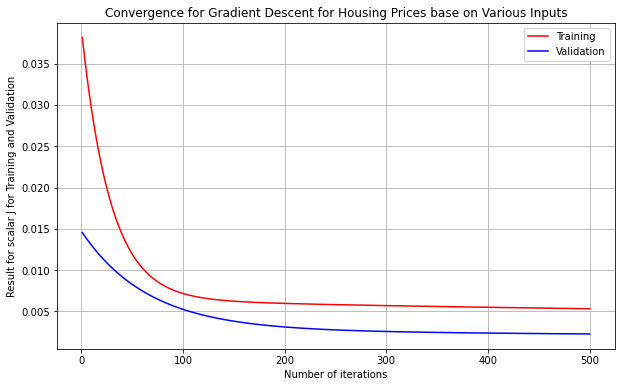

In [586]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_T, color='Red', label='Training' )
plt.plot(range(1, iterations + 1), result_V, color='Blue', label='Validation' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Result for scalar J for Training and Validation')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [587]:
#*************************************************************************************************************************#
#*************************************************************************************************************************#

In [588]:
#Problem 3

In [589]:
#-------------------------------------------------------------------------------------------------------------------------#

In [590]:
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
180,0.193103,0.6,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.330000
189,0.126897,0.2,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.313333
93,0.379310,0.4,0.333333,0.000000,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.433333
444,0.097931,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.140000
81,0.158621,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.463333
345,0.021724,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.200000
314,0.161379,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.223333
115,0.434483,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.406667
286,0.074966,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.236667
400,0.124966,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.166667


In [591]:
df_Newtest.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
62,0.397403,0.666667,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.460606
247,0.584416,0.666667,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.242424
142,0.766234,0.666667,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333
107,0.412987,0.333333,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.378788
483,0.429870,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.103030
351,0.168831,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.175758
516,0.137662,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.060606
47,0.428571,0.333333,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.496970
481,0.090909,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.103030
90,0.290043,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.406061


In [592]:
#Illistrating the changes needed for adding regularization parameterpenalties
def calculate_scalar(X, Y, theta): #Declaring values and computing the Scalar value J
    
    predictions = X.dot(theta)  #Dot product of array X and theta
    errors = np.subtract(predictions,Y) #Matrix subtraction with predictions and Y
    squaringErrors = np.square(errors) #Now errors contained in matrix. We square all values in matrix error.
    J = 1/(2*M)*np.sum(squaringErrors) #Scalar equation using matrix squErrors
    return J

In [593]:
#Need to modify the gradient decent logic for your training set only
def gradient_descent_training(X, Y, theta, alpha, delta, iterations):  #Function to calculate gradient descent for linear regression
    
    result = np.zeros(iterations)   #creating a row of an array with an undetermined amount of zeroes.
    theta_interval = np.zeros([iterations, theta.size])  #creating an array for each interval to be plotted (X1, X2, X3) 
    
    for i in range(iterations):    #For loop with iterations as an input.
        predictions = X.dot(theta)   #Dot product of array X and theta resulting in scalar
        errors = np.subtract(predictions,Y) #Matrix subtration between predictions and value Y
        sum_delta = alpha*((1/M)*X.transpose().dot(errors) + ((delta/M)*theta)); #learning rate over training examples * scalar 
                                                                               #of resulting dot product with parameter penalties
                                                                               #for Regularization.
        theta = theta-sum_delta;   #Current theta minus scalar sum_delta for final value of theta                      
        result[i] = calculate_scalar(X, Y, theta)
        theta_interval[i] = theta #Needed to show the previous thetas used for the resulting scalar.

    return theta, result, theta_interval

In [594]:
# Part 3-a

In [595]:
# Using reshape function convert all X variables 1D array to 2D array for Training Set
X_T = np.ones((M_T,1))
Y_T = price_T 

area_T = area_T.reshape(M_T,1)
bedrooms_T = bedrooms_T.reshape(M_T,1)
bathrooms_T = bathrooms_T.reshape(M_T,1)
stories_T = stories_T.reshape(M_T,1)
parking_T = parking_T.reshape(M_T,1)

X_T = np.hstack((X_T,area_T,bedrooms_T,bathrooms_T,stories_T,parking_T))

In [596]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(6)
iterations = 500;
alpha = 0.01;
delta = 10;
result_T = calculate_scalar(X_T,Y_T, theta)
print('Scalar values is ', result_T) #Print the scalar value for Gradient Descent

Scalar values is  0.03929700503217126


In [597]:
#Calculating gradient descent with theta and scalar J for training set
theta, result_T, theta_interval = gradient_descent_training(X_T, Y_T, theta, alpha, delta, iterations) #Changed for Regularization
print('Final value of theta =', theta)
print('Y = ', result_T)

Final value of theta = [0.18354835 0.08200517 0.09106968 0.05731011 0.08933392 0.08318999]
Y =  [0.03869566 0.03810582 0.03752728 0.03695981 0.0364032  0.03585724
 0.03532173 0.03479646 0.03428124 0.03377586 0.03328015 0.03279392
 0.03231697 0.03184914 0.03139025 0.03094012 0.03049859 0.03006549
 0.02964066 0.02922393 0.02881515 0.02841417 0.02802084 0.02763501
 0.02725654 0.02688528 0.02652109 0.02616384 0.0258134  0.02546963
 0.0251324  0.02480159 0.02447708 0.02415874 0.02384646 0.02354011
 0.02323959 0.02294477 0.02265556 0.02237184 0.02209351 0.02182047
 0.0215526  0.02128982 0.02103202 0.02077911 0.02053099 0.02028758
 0.02004877 0.01981449 0.01958465 0.01935915 0.01913793 0.01892088
 0.01870794 0.01849903 0.01829406 0.01809296 0.01789566 0.01770209
 0.01751217 0.01732583 0.017143   0.01696362 0.01678762 0.01661493
 0.01644549 0.01627925 0.01611613 0.01595607 0.01579903 0.01564493
 0.01549373 0.01534537 0.01519979 0.01505694 0.01491677 0.01477922
 0.01464425 0.01451181 0.01438185

In [598]:
# Using reshape function convert all X variables 1D array to 2D array for Validation Set
X_V = np.ones((M_V,1))
Y_V = price_V 

area_V = area_V.reshape(M_V,1)
bedrooms_V = bedrooms_V.reshape(M_V,1)
bathrooms_V = bathrooms_V.reshape(M_V,1)
stories_V = stories_V.reshape(M_V,1)
parking_V = parking_V.reshape(M_V,1)

X_V = np.hstack((X_V,area_V,bedrooms_V,bathrooms_V,stories_V,parking_V))

In [599]:
#Making a theta array with initializations of O and setting validation parameters.
theta = np.zeros(6)
iterations = 500;
alpha = 0.01;
result_V = calculate_scalar(X_V,Y_V, theta)
print('Scalar values is ', result_V) #Print the scalar value for Gradient Descent

Scalar values is  0.014721578503972165


In [600]:
#Calculating gradient descent with theta and scalar J for validation set
theta, result_V, theta_interval = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_V)

Final value of theta = [0.15678227 0.06616328 0.06484567 0.04638205 0.0706804  0.0585738 ]
Y =  [0.0146279  0.01453498 0.01444281 0.01435139 0.01426071 0.01417076
 0.01408154 0.01399305 0.01390527 0.0138182  0.01373184 0.01364618
 0.01356121 0.01347692 0.01339332 0.0133104  0.01322815 0.01314656
 0.01306563 0.01298536 0.01290574 0.01282676 0.01274843 0.01267072
 0.01259364 0.01251719 0.01244136 0.01236614 0.01229153 0.01221752
 0.01214411 0.01207129 0.01199907 0.01192742 0.01185636 0.01178587
 0.01171595 0.0116466  0.0115778  0.01150957 0.01144188 0.01137474
 0.01130815 0.01124209 0.01117656 0.01111157 0.0110471  0.01098315
 0.01091972 0.0108568  0.01079439 0.01073248 0.01067108 0.01061017
 0.01054975 0.01048982 0.01043037 0.0103714  0.01031291 0.01025489
 0.01019734 0.01014026 0.01008363 0.01002746 0.00997175 0.00991648
 0.00986166 0.00980728 0.00975335 0.00969984 0.00964677 0.00959413
 0.00954191 0.00949011 0.00943873 0.00938776 0.00933721 0.00928706
 0.00923732 0.00918797 0.00913903

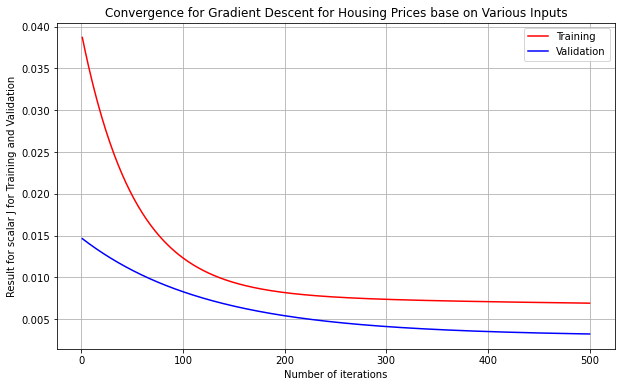

In [601]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_T, color='Red', label='Training' )
plt.plot(range(1, iterations + 1), result_V, color='Blue', label='Validation' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Result for scalar J for Training and Validation')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [602]:
#Part 3-b

In [603]:
# Using reshape function convert all X variables 1D array to 2D array for training set
X_T = np.ones((M_T,1))
Y_T = price_T

area_T = area_T.reshape(M_T,1)
bedrooms_T = bedrooms_T.reshape(M_T,1)
bathrooms_T = bathrooms_T.reshape(M_T,1)
stories_T = stories_T.reshape(M_T,1)
mainroad_T = mainroad_T.reshape(M_T,1)
guestroom_T = guestroom_T.reshape(M_T,1)
basement_T = basement_T.reshape(M_T,1)
hotwaterheating_T = hotwaterheating_T.reshape(M_T,1)
airconditioning_T = airconditioning_T.reshape(M_T,1)
parking_T = parking_T.reshape(M_T,1)
prefarea_T = prefarea_T.reshape(M_T,1)

X_T = np.hstack((X_T,area_T,bedrooms_T,bathrooms_T,stories_T,mainroad_T,guestroom_T,basement_T,hotwaterheating_T,airconditioning_T,parking_T,prefarea_T))

In [604]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(12)
iterations = 500;
alpha = 0.01;
delta = 100;
result_T = calculate_scalar(X_T,Y_T, theta)
print('Scalar values is ', result_T) #Print the scalar value for Gradient Descent

Scalar values is  0.03929700503217126


In [605]:
#Calculating gradient descent with theta and scalar J
theta, result_T, theta_interval = gradient_descent_training(X_T, Y_T, theta, alpha, delta, iterations)
print('Final value of theta =', theta)
print('Y = ', result_T)

Final value of theta = [0.08857242 0.0428179  0.04886467 0.03485761 0.05275803 0.08531023
 0.02889919 0.04304791 0.01216393 0.05752991 0.04587064 0.04167828]
Y =  [0.0381544  0.03705349 0.03599269 0.03497052 0.03398553 0.03303632
 0.03212157 0.03123998 0.03039032 0.0295714  0.02878207 0.02802123
 0.02728781 0.02658081 0.02589923 0.02524213 0.02460861 0.02399778
 0.0234088  0.02284088 0.02229321 0.02176506 0.02125571 0.02076445
 0.02029062 0.01983358 0.01939271 0.01896741 0.01855711 0.01816125
 0.01777931 0.01741077 0.01705514 0.01671195 0.01638074 0.01606108
 0.01575254 0.01545471 0.0151672  0.01488965 0.01462167 0.01436293
 0.01411309 0.01387183 0.01363883 0.0134138  0.01319644 0.01298648
 0.01278365 0.0125877  0.01239837 0.01221543 0.01203864 0.01186779
 0.01170266 0.01154305 0.01138876 0.0112396  0.01109539 0.01095595
 0.0108211  0.01069069 0.01056457 0.01044256 0.01032454 0.01021036
 0.01009988 0.00999298 0.00988952 0.00978939 0.00969247 0.00959865
 0.00950781 0.00941986 0.00933469

In [606]:
# Using reshape function convert all X variables 1D array to 2D array for training set
X_V = np.ones((M_V,1))
Y_V = price_V

area_V = area_V.reshape(M_V,1)
bedrooms_V = bedrooms_V.reshape(M_V,1)
bathrooms_V = bathrooms_V.reshape(M_V,1)
stories_V = stories_V.reshape(M_V,1)
mainroad_V = mainroad_V.reshape(M_V,1)
guestroom_V = guestroom_V.reshape(M_V,1)
basement_V = basement_V.reshape(M_V,1)
hotwaterheating_V = hotwaterheating_V.reshape(M_V,1)
airconditioning_V = airconditioning_V.reshape(M_V,1)
parking_V = parking_V.reshape(M_V,1)
prefarea_V = prefarea_V.reshape(M_V,1)

X_V = np.hstack((X_V,area_V,bedrooms_V,bathrooms_V,stories_V,mainroad_V,guestroom_V,basement_V,hotwaterheating_V,airconditioning_V,parking_V,prefarea_V))

In [607]:
#Making a theta array with initializations of O and setting training parameters.
theta = np.zeros(12)
iterations = 500;
alpha = 0.01;
result_V = calculate_scalar(X_V,Y_V, theta)
print('Scalar values is ', result_V) #Print the scalar value for Gradient Descent

Scalar values is  0.014721578503972165


In [608]:
#Calculating gradient descent with theta and scalar J
theta, result_V, theta_interval = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', result_V)

Final value of theta = [0.08766078 0.04286365 0.04204161 0.03495189 0.04844207 0.08261055
 0.029787   0.02795277 0.00957096 0.07679965 0.03949039 0.04124152]
Y =  [0.01453936 0.0143599  0.01418314 0.01400905 0.01383759 0.01366871
 0.01350238 0.01333856 0.01317722 0.0130183  0.01286178 0.01270762
 0.01255579 0.01240624 0.01225895 0.01211388 0.01197099 0.01183026
 0.01169164 0.01155511 0.01142064 0.0112882  0.01115775 0.01102926
 0.0109027  0.01077805 0.01065528 0.01053435 0.01041524 0.01029792
 0.01018237 0.01006856 0.00995645 0.00984603 0.00973727 0.00963014
 0.00952462 0.00942069 0.00931832 0.00921748 0.00911816 0.00902033
 0.00892397 0.00882905 0.00873555 0.00864346 0.00855275 0.0084634
 0.00837539 0.00828869 0.0082033  0.00811918 0.00803633 0.00795471
 0.00787432 0.00779513 0.00771712 0.00764028 0.00756459 0.00749003
 0.00741659 0.00734424 0.00727298 0.00720277 0.00713362 0.0070655
 0.0069984  0.00693229 0.00686718 0.00680303 0.00673984 0.00667759
 0.00661627 0.00655586 0.00649636 0

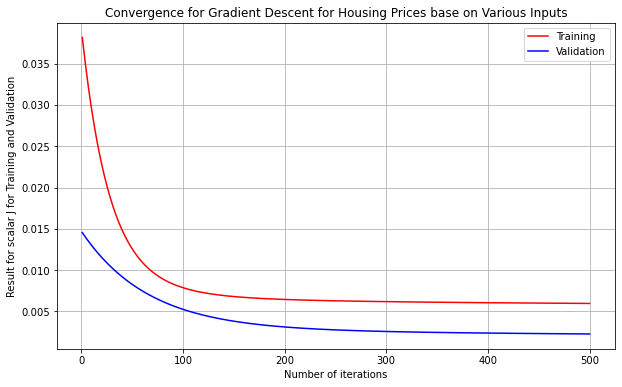

In [609]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_T, color='Red', label='Training' )
plt.plot(range(1, iterations + 1), result_V, color='Blue', label='Validation' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Result for scalar J for Training and Validation')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()